### Overview
Ford GoBike is a public bike sharing system in San Francisco. It has 260+ stations and 2600+ bikes. This project explores the Ford GoBike data set for April 2019. The data set has 182163 entries and 10 columns. Approximatly 156000 users are subscribers and 25000 are customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

In [2]:
df=pd.read_csv('201905-baywheels-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990.0,Female,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994.0,Male,No
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988.0,Male,No
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998.0,Male,No
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
member_birth_year          173694 non-null float64
member_gender              173697 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.2+ MB


### Cleaning 
1-Drop unecessary columns

In [4]:
df=df.drop(columns=['start_station_latitude','start_station_longitude',
                    'end_station_latitude','end_station_longitude','bike_share_for_all_trip'])

2-Make 2 columns for the date and time instead of being in one column. We will do it on both `start_time` and `end_time` so there will be 4 columns. This will make the data tidy and easy to manipulate.

In [5]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_date'] = [datetime.datetime.date(d) for d in df['start_time']]
df['start_time'] = [datetime.datetime.time(d) for d in df['start_time']]

df['end_date'] = [datetime.datetime.date(d) for d in df['end_time']]
df['end_time'] = [datetime.datetime.time(d) for d in df['end_time']]

In [6]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_date,end_date
0,48877,20:34:56.811000,10:09:34.796000,321.0,5th St at Folsom,60.0,8th St at Ringold St,1416,Customer,1990.0,Female,2019-05-31,2019-06-01
1,47050,19:43:56.196000,08:48:06.919000,246.0,Berkeley Civic Center,266.0,Parker St at Fulton St,1797,Subscriber,1994.0,Male,2019-05-31,2019-06-01
2,5912,23:54:24.089000,01:32:56.982000,149.0,Emeryville Town Hall,149.0,Emeryville Town Hall,3612,Customer,1988.0,Male,2019-05-31,2019-06-01
3,2629,23:59:57.449000,00:43:46.874000,186.0,Lakeside Dr at 14th St,186.0,Lakeside Dr at 14th St,2333,Customer,1998.0,Male,2019-05-31,2019-06-01
4,4235,23:05:48.932000,00:16:24.457000,34.0,Father Alfred E Boeddeker Park,368.0,Myrtle St at Polk St,181,Subscriber,1967.0,Male,2019-05-31,2019-06-01


In [7]:
df.user_type.value_counts()

Subscriber    156669
Customer       25494
Name: user_type, dtype: int64

### Visualization

**Distribution of ages**

We will make an age column and remove the birth year column.

In [8]:
df['age']=[2019-d for d in df.member_birth_year]
df=df.drop(columns='member_birth_year')

In [9]:
np.log10(df.age.describe())

count    5.239785
mean     1.539286
std      1.012803
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.089905
Name: age, dtype: float64

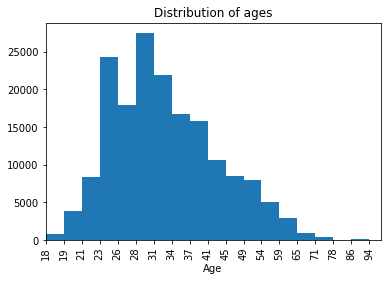

In [10]:
#transform the x scale to logarithmic scale
bins=10**np.arange(1.255273,2.089905+0.04,0.04)
plt.hist(data=df,x='age',bins=bins);
plt.xscale('log');
plt.tick_params(axis='x',which='minor',bottom=False,top=False,labelbottom=False)
labels=[int(d) for d in bins]
plt.xticks(bins,labels,rotation=90);
plt.xlim((18,100));
plt.xlabel('Age');
plt.title('Distribution of ages');

Most users are between 28 and 30 years old.

**Distribution of the duration of trips in minutes**

How long are most trips in minutes?

First we should make a column for the durations in minutes.

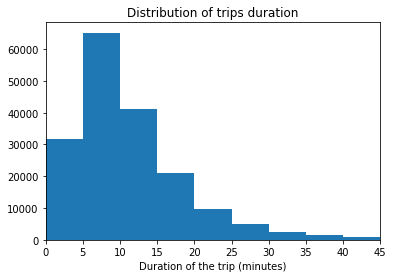

In [11]:
df['duration_min']=df['duration_sec']//60 #this calculate how many minutes
bins=np.arange(0,df.duration_min.max()+5,5)
plt.hist(data=df,x='duration_min',bins=bins);
plt.xlim((0,45));
plt.xlabel('Duration of the trip (minutes)');
plt.title('Distribution of trips duration');

Most trips take 5 to 10 minutes, and very few people take more than 45 minutes.

**Distribution of the starting hour of the trip**

When do most people start their trip?

Similar to age, we need to make a column for the starting hour.

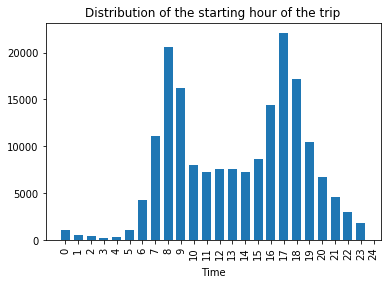

In [12]:
df['start_hour']=[d.hour for d in df.start_time]
bins=np.arange(0,24+1,1)
plt.hist(data=df,x='start_hour',bins=bins,rwidth=0.7);
plt.xticks(bins+0.5,bins,rotation=90);
plt.xlabel('Time',labelpad=8);
plt.title('Distribution of the starting hour of the trip');

We have a bimodal distribution. Most trips start at 8 AM and 5 PM. These are the rush hours and they are the hours of going and coming back from work.

**Distribution of weekdays**

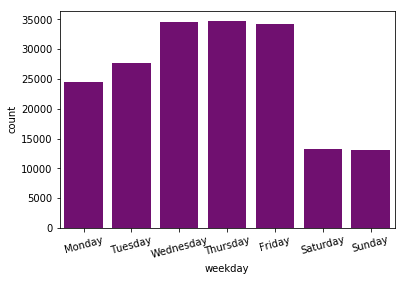

In [13]:
df['start_date']=pd.to_datetime(df['start_date'])
df['weekday']=df['start_date'].dt.day_name() # this return what day of the week it is
ordered=pd.api.types.CategoricalDtype(ordered=True,categories=['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                              'Saturday','Sunday'])
df['weekday']=df['weekday'].astype(ordered)
sb.countplot(data=df,x='weekday',color='purple');
plt.xticks(rotation=15);

Ford GoBike users use bikes mainly for work based on the hour and weekdays distributions. And many users are in the middle of the week.

**Relationship between the age and the durations of the trips**

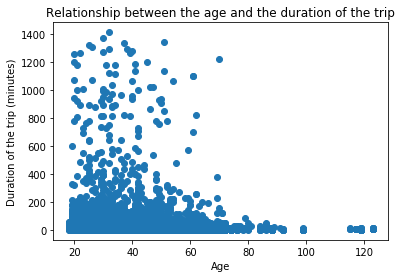

In [14]:
plt.scatter(data=df,x='age',y='duration_min');
plt.xlabel('Age');
plt.ylabel('Duration of the trip (minutes)');
plt.title('Relationship between the age and the duration of the trip');

We can see that as the person gets older his trips become shorter.

/Users/apple/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/apple/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


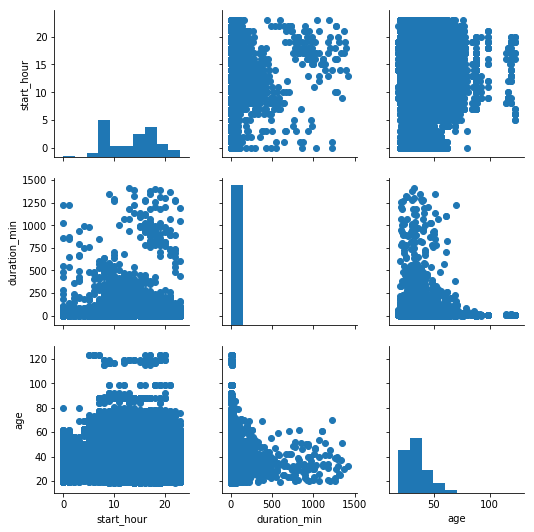

In [15]:
#make a pair grid
var=['start_hour','duration_min','age']
g=sb.PairGrid(data=df,vars=var);
g=g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

**Distribution of time based on user type**

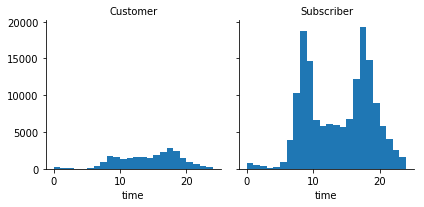

In [16]:
bins=np.arange(0,24+1,1)
g=sb.FacetGrid(data=df,col='user_type');
g.map(plt.hist,'start_hour',bins=bins);
g.set_xlabels('time');
g.set_titles('{col_name}');

The Customers distribution looks more flattened, this means that most subscribers are workers and use Ford GoBike for work while most customers use it for other purposes.

**Violin plot of Weekday vs. trip duration**

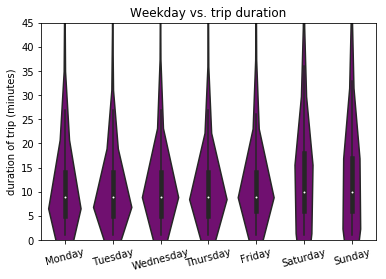

In [17]:
sb.violinplot(data=df,x='weekday',y='duration_min',color='purple');
plt.xlabel('');
plt.ylabel('duration of trip (minutes)');
plt.title('Weekday vs. trip duration');
plt.xticks(rotation=15);
plt.ylim((0,45));

**Violin plot of Weekday vs. time**

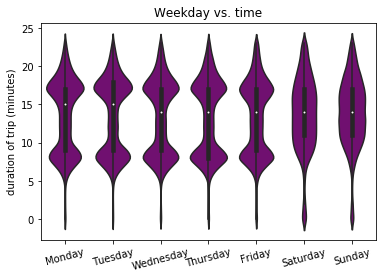

In [18]:
sb.violinplot(data=df,x='weekday',y='start_hour',color='purple');
plt.xlabel('');
plt.ylabel('duration of trip (minutes)');
plt.title('Weekday vs. time');
plt.xticks(rotation=15);

the patterns change on the weekends.

**Heat map for the duration of trips vs. time**

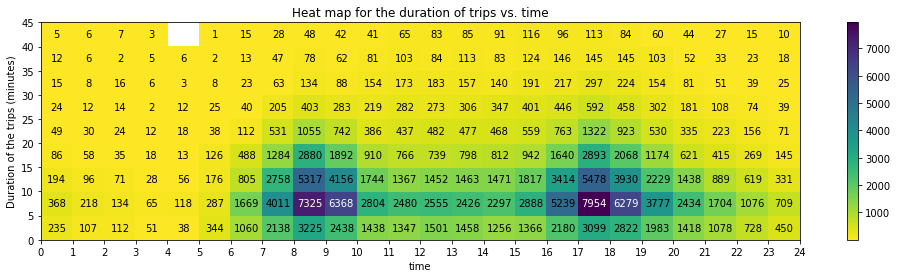

In [19]:
xbins=np.arange(0,25,1)
ybins=np.arange(0,45+5,5)
h=plt.hist2d(data=df,x='start_hour',y='duration_min',bins=[xbins,ybins],cmin=0.1,cmap='viridis_r');
plt.xticks(xbins,xbins);
plt.xlabel('time');
plt.ylabel('Duration of the trips (minutes)');
plt.title('Heat map for the duration of trips vs. time');
plt.colorbar();
plt.gcf().set_size_inches(17,4)

#plot counts on the heatmap
counts=h[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c=counts[i,j]
        if c>=6000: #if the color is dark plot the text in white. otherwise, in black
            plt.text(xbins[i]+0.5,ybins[j]+2.5,int(c),ha='center',va='center',color='white')
        elif c>0:
            plt.text(xbins[i]+0.5,ybins[j]+2.5,int(c),ha='center',va='center',color='black')

There is a concentration of trips that take 5-9 minutes and were in 8AM and 5PM.

**The average duration of the trips for each gender**

In [20]:
df2=df[(df['member_gender']=='Male') | (df['member_gender']=='Female')]

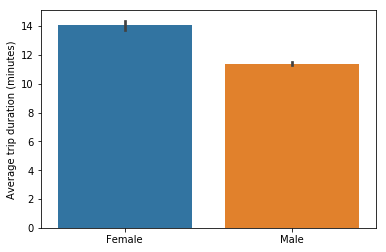

In [21]:
sb.barplot(data=df2,x='member_gender',y='duration_min');
plt.xlabel('');
plt.ylabel('Average trip duration (minutes)');

The average trip duration for Females is 11 minutes, while the average for males is 14 minutes.

**Relationship between gender, user type, and trips durations**

Does the average trip duration depend on the user type?

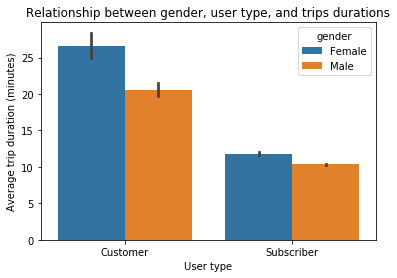

In [22]:
sb.barplot(data=df2,x='user_type',y='duration_min',hue='member_gender');
plt.xlabel('User type');
plt.ylabel('Average trip duration (minutes)');
plt.title('Relationship between gender, user type, and trips durations');
plt.legend(title='gender');

Customers trips are much longer than subscribers. Customers trips are between 20 and 26 minutes, while subscribers trips are around 10 minutes. Females are longer in both.

**Relationship between user type, age, and trip duration**

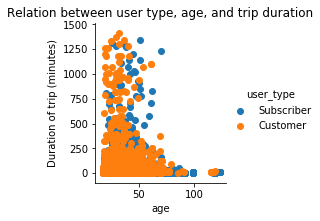

In [23]:
g=sb.FacetGrid(data=df,hue='user_type',hue_order=['Subscriber','Customer'])
g.map(plt.scatter,'age','duration_min')
plt.ylabel('Duration of trip (minutes)');
g.add_legend();
plt.title('Relation between user type, age, and trip duration');

### Summary
- Most trips take 5 to 10 minutes, and very few people take more than 45 minutes.<br><br>
- Most trips start at 8 AM and 5 PM. These are the rush hours and they are the hours of going and coming back from work.<br><br>
- Ford GoBike users use bikes mainly for work based on the hour and weekdays distributions. And many users are in the middle of the week. <br><br>
- Most subscribers are workers and use Ford GoBike for work while most customers use it for other purposes.<br><br>
- Customers trips are much longer than subscribers, and females trips are longer than males.